In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/6.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/5.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/8.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/10.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/9.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/1.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/7.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/13.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/15.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/12.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/11.jpg
/kaggle/input/brasov-landmark-recognition-dataset/validation/graft_bastion/4.jpg
/kaggle/input/brasov-la

# **Creating label dictionary enumerating the landmarks in ob_tur folder (where is the training data)**

In [2]:
df = pd.DataFrame(columns=['name','image_path','label'])
base_path = "../input/brasov-landmark-recognition-dataset/ob_tur"
label_dict = {x : idx for idx,x in enumerate(os.listdir(base_path))}

print(label_dict)

for x in os.listdir(base_path):
    for y in os.listdir(base_path+"/"+x):
        temp = pd.DataFrame({"name" : y,"image_path" : x+"/"+y,"label" : label_dict[x]},index=[0])
        df = df.append(temp)
df.to_csv("date.csv",index=False)

{'graft_bastion': 0, 'cascade_urlatoarea': 1, 'rasnov_citadel': 2, 'council_house': 3, 'catherine_gate': 4, 'not_obj': 5, 'first_school': 6, 'aventura_park': 7, 'black_church': 8, 'bran_castle': 9}


# **Creating label dictionary enumerating the landmarks in validation folder**

In [3]:
df = pd.DataFrame(columns=['name','image_path','label'])
validation_path = "../input/brasov-landmark-recognition-dataset/validation"

print(label_dict)

for x in os.listdir(validation_path):
    for y in os.listdir(validation_path+"/"+x):
        temp = pd.DataFrame({"name" : y,"image_path" : x+"/"+y,"label" : label_dict[x]},index=[0])
        df = df.append(temp)
df.to_csv("validation.csv",index=False)

{'graft_bastion': 0, 'cascade_urlatoarea': 1, 'rasnov_citadel': 2, 'council_house': 3, 'catherine_gate': 4, 'not_obj': 5, 'first_school': 6, 'aventura_park': 7, 'black_church': 8, 'bran_castle': 9}


# **Visualization of the validation.csv and data.csv**

In [4]:
valid = pd.read_csv("validation.csv")
valid

name            image_path  label
0     6.jpg   graft_bastion/6.jpg      0
1     5.jpg   graft_bastion/5.jpg      0
2     8.jpg   graft_bastion/8.jpg      0
3    10.jpg  graft_bastion/10.jpg      0
4     9.jpg   graft_bastion/9.jpg      0
..      ...                   ...    ...
141  11.jpg    bran_castle/11.jpg      9
142   4.jpg     bran_castle/4.jpg      9
143   3.jpg     bran_castle/3.jpg      9
144  14.jpg    bran_castle/14.jpg      9
145   2.jpg     bran_castle/2.jpg      9

[146 rows x 3 columns]

In [5]:
df = pd.read_csv("date.csv")
df

name              image_path  label
0    0733.jpg  graft_bastion/0733.jpg      0
1    0748.jpg  graft_bastion/0748.jpg      0
2    0700.jpg  graft_bastion/0700.jpg      0
3    0742.jpg  graft_bastion/0742.jpg      0
4    0781.jpg  graft_bastion/0781.jpg      0
..        ...                     ...    ...
981  0239.jpg    bran_castle/0239.jpg      9
982  0202.jpg    bran_castle/0202.jpg      9
983  0272.jpg    bran_castle/0272.jpg      9
984  0200.jpg    bran_castle/0200.jpg      9
985  0269.jpg    bran_castle/0269.jpg      9

[986 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split
# Splitting our datas from ob_tur folder into train and test data
X_train, X_test, y_train, y_test = train_test_split(df['image_path'].values, df['label'].values, test_size=0.30, random_state=1)

<AxesSubplot:ylabel='Frequency'>

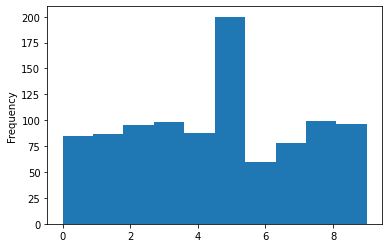

In [7]:
# Plotting the frequency of labels in the dataset
df['label'].plot(kind = 'hist')

# **Creating Dataloaders**

In [8]:
import cv2 as cv

class Landmark:

    def __init__(self, landmarks_frame,label, root_dir):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = landmarks_frame 
        self.root_dir = root_dir
        self.label = label

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_name = self.landmarks_frame[idx]    
        image_path = self.root_dir + "/"+ file_name
    
#       Reading each image with OpenCV by giving the specific path
        image = cv.imread(image_path)
        image = cv.resize(image, (250, 250), interpolation=cv.INTER_AREA)
        height, width , layers = image.shape
        size=(width,height)
        # image = cv.resize(image,(250,250))
        landmarks = self.label[idx]
        
#       Transforming images into tensors and normalizing them 
        tensor_image = to_tensor(image)
        normalized_tensor_image = normalize(tensor_image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        
#       Transforimg labels into tensors as well
        label = torch.tensor(landmarks)
        tensor_label = torch.tensor(label)

        return normalized_tensor_image, tensor_label

In [16]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
torch.backends.cudnn.benchmark = True
batch_size=64
# Creating train, test and validation dataloaders
train_loader = DataLoader(Landmark(X_train,y_train,base_path), batch_size, shuffle=True)
test_loader = DataLoader(Landmark(X_test,y_test,base_path), batch_size=1, shuffle=False)
validation_loader = DataLoader(Landmark(valid["image_path"].values,valid["label"].values, validation_path), batch_size=1, shuffle=False)


# **Efficientnet Model Pretrained**

> I am trying to solve the classification problem with a new family of convolutional networks due to its fast training speed and good parameter efficiency. EfficientNets are based on AutoML and Compound Scaling. I am using the PyTorch re-implementation of EfficientNet.

In [10]:
pip install efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.


In [17]:
from torch.cuda.amp import autocast
import torch.nn as nn
class ModelCustom(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b1',in_channels =3)
        self.fc = nn.Linear(1000, 10)

    def forward(self, x):
        features = self.model(x)
        output = self.fc(features)
        return output

In [18]:
import torch.optim as optim
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

epochs = 20
network3 = ModelCustom().cuda()

optimizer = optim.Adam(network3.parameters(), lr=1e-4)
# Making all the gradients 0 before backpropagation 
optimizer.zero_grad()
loss_fn = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b1


In [13]:
# Definition of the train function
import matplotlib.pyplot as plt
def train_fn(epochs: int, train_loader: DataLoader, test_loader: DataLoader, net: nn.Module, loss_fn: nn.Module, optimizer: optim.Optimizer):
    train_loss=[]
    test_loss=[]
    use_cuda = True
    # Iteration through number of epochs
    for e in range(epochs):
    # Iteration through each example in dataset
        for images, labels in train_loader:
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
              # Applying neural network on iterated images
                out = net(images)
              # Applying loss function on the output of neural network and labels 
                loss = loss_fn(out, labels)
              # Applying back-propagation algorithm
                loss.backward()
              # Optimizing step, applying gradients on our network params
                optimizer.step()
              # Calling zero_grad() function for giving up on gradients from the current iteration
                optimizer.zero_grad()
        train_loss.append(loss.item())        
        print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))
    
         # Accuracy score
        count = len(test_loader)
        correct = 0
        net.eval()
        with torch.no_grad():
            for test_image, test_label in test_loader:
                if use_cuda:
                    test_label = test_label.cuda()
                    test_image = test_image.cuda()
                    output = net(test_image)
                    loss = loss_fn(output, test_label)
                    out_class = torch.argmax(output)
                if out_class == test_label:
                    correct += 1
        test_loss.append(loss.item())
      
        print("Acuratetea la finalul epocii {} este {:.2f}%".format(e, (correct / count) * 100))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.show()

In [20]:
import gc
gc.collect()

4571

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Loss-ul la finalul epocii 0 are valoarea 1.7866177558898926
Acuratetea la finalul epocii 0 este 36.49%
Loss-ul la finalul epocii 1 are valoarea 0.497527539730072
Acuratetea la finalul epocii 1 este 83.45%
Loss-ul la finalul epocii 2 are valoarea 0.2635728418827057
Acuratetea la finalul epocii 2 este 93.58%
Loss-ul la finalul epocii 3 are valoarea 0.03130979463458061
Acuratetea la finalul epocii 3 este 92.57%
Loss-ul la finalul epocii 4 are valoarea 0.00334052462130785
Acuratetea la finalul epocii 4 este 93.58%
Loss-ul la finalul epocii 5 are valoarea 0.0014288157690316439
Acuratetea la finalul epocii 5 este 93.24%
Loss-ul la finalul epocii 6 are valoarea 0.0009715349297039211
Acuratetea la finalul epocii 6 este 93.58%
Loss-ul la finalul epocii 7 are valoarea 0.0004988384316675365
Acuratetea la finalul epocii 7 este 93.92%
Loss-ul la finalul epocii 8 are valoarea 0.0003429236530791968
Acuratetea la finalul epocii 8 este 94.59%
Loss-ul la finalul epocii 9 are valoarea 0.00040226147393696

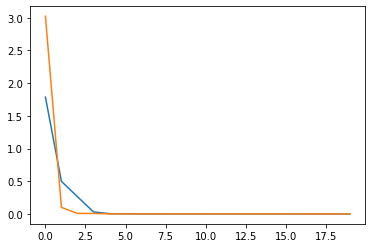

In [21]:
train_fn(epochs, train_loader, test_loader, network3, loss_fn, optimizer)

# **Confusion matrix and observations**

> I am separating the data images from labels, placing them in two distinct lists

In [22]:
list1=[]
list2=[]

for x,y in test_loader:
    x=x.cuda()
    output=network3(x).argmax().detach().cpu().numpy()
    list1.append(output)
    list2.append(y.numpy()[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(list1,list2)

array([[25,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 24,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 1,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 21,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 60,  0,  1,  3,  1],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  1,  0,  0,  0,  2,  0,  1, 32]])

> This is a function which helps in finding if the values in the dictionary match their keys

In [24]:
def get_key(val):
    for key, value in label_dict.items():
         if val == value:
            return key

> Trying to show all the images whose values of the dictionary do not match with their keys from test datas

predicted location:  not_obj  actual location:  aventura_park


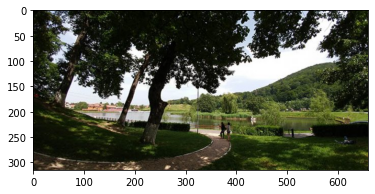

predicted location:  not_obj  actual location:  council_house


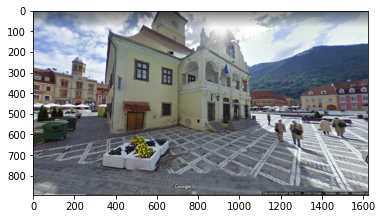

predicted location:  bran_castle  actual location:  first_school


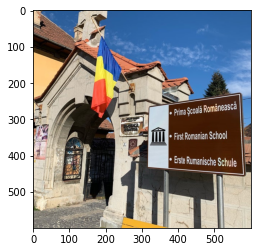

predicted location:  rasnov_citadel  actual location:  graft_bastion


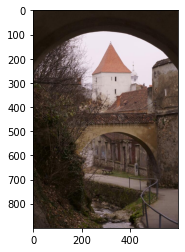

predicted location:  bran_castle  actual location:  rasnov_citadel


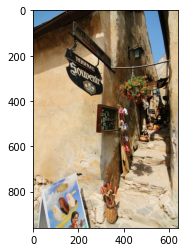

predicted location:  bran_castle  actual location:  black_church


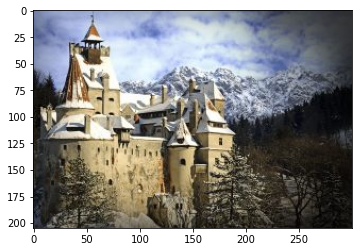

predicted location:  cascade_urlatoarea  actual location:  not_obj


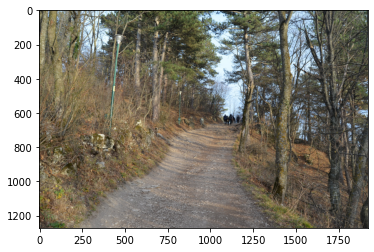

predicted location:  not_obj  actual location:  bran_castle


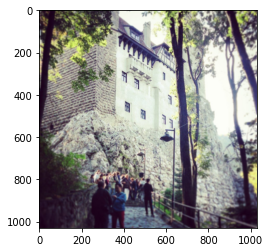

predicted location:  council_house  actual location:  bran_castle


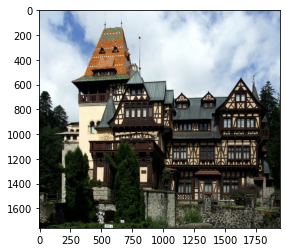

predicted location:  not_obj  actual location:  black_church


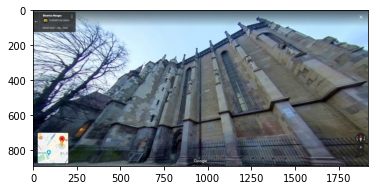

predicted location:  graft_bastion  actual location:  rasnov_citadel


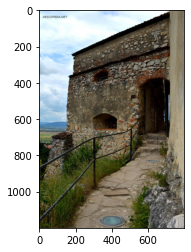

predicted location:  not_obj  actual location:  black_church


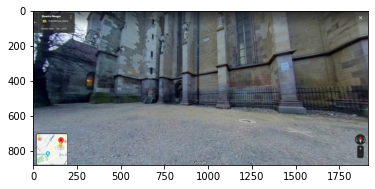

predicted location:  graft_bastion  actual location:  bran_castle


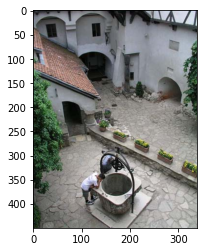

predicted location:  cascade_urlatoarea  actual location:  not_obj


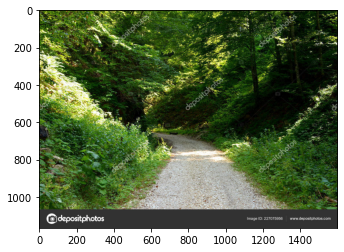

predicted location:  bran_castle  actual location:  first_school


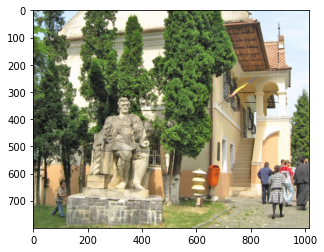

predicted location:  not_obj  actual location:  black_church


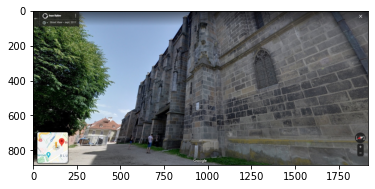

predicted location:  aventura_park  actual location:  graft_bastion


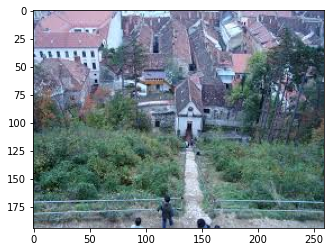

predicted location:  council_house  actual location:  catherine_gate


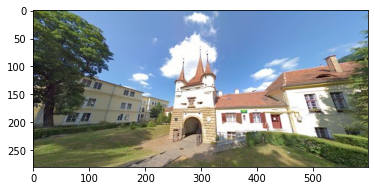

In [25]:
import matplotlib.pyplot as plt

for idx,(i,j) in enumerate(zip(list1,list2)):
      if(i != j):
        print("predicted location: ",get_key(i)," actual location: ",get_key(j))
        image_path = base_path + "/"+ X_test[idx]
        imagine = cv.imread(image_path)
        plt.imshow(imagine[:,:,[2,1,0]])
        plt.show()


> I am separating the validation images from labels, placing them in two distinct lists

In [26]:
list3=[]
list4=[]

for i,j in validation_loader:
    i=i.cuda()
    output2=network3(i).argmax().detach().cpu().numpy()
    list3.append(output2)
    list4.append(j.numpy()[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(list3,list4)

array([[15,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0, 16,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(list3, list4)

0.9452054794520548

> Trying to show all the images whose values of the dictionary do not match with their keys from validation datas

predicted location:  aventura_park  actual location:  cascade_urlatoarea


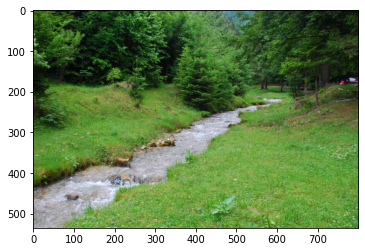

predicted location:  not_obj  actual location:  cascade_urlatoarea


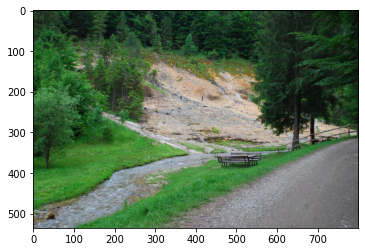

predicted location:  not_obj  actual location:  cascade_urlatoarea


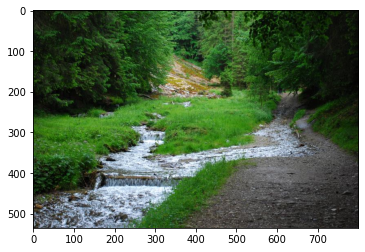

predicted location:  graft_bastion  actual location:  rasnov_citadel


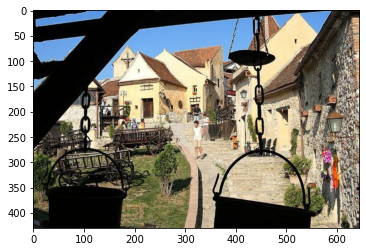

predicted location:  not_obj  actual location:  first_school


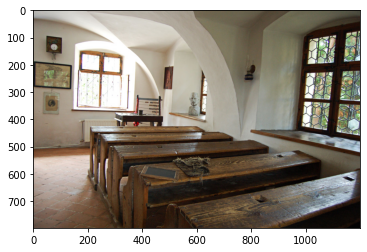

predicted location:  catherine_gate  actual location:  black_church


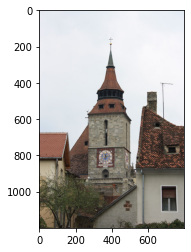

predicted location:  graft_bastion  actual location:  bran_castle


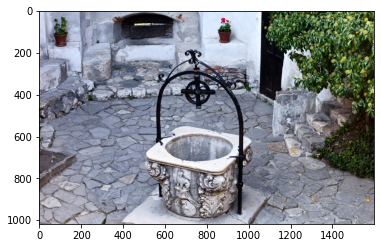

predicted location:  not_obj  actual location:  bran_castle


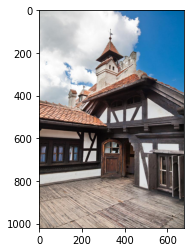

In [29]:
for idx,(i,j) in enumerate(zip(list3,list4)):
      if(i != j):
        print("predicted location: ",get_key(i)," actual location: ",get_key(j))
        image_path = validation_path + "/"+ valid["image_path"].values[idx]
        imagine = cv.imread(image_path)
        plt.imshow(imagine[:,:,[2,1,0]])
        plt.show()